In [ ]:
#conda install -c conda-forge findspark

In [1]:
import findspark
findspark.init()
findspark.find()
import pyspark
findspark.find()

'C:\\Sparkjava\\spark-2.4.5-bin-hadoop2.7'

In [2]:
import pyspark # only run after findspark.init()
from pyspark.sql import SparkSession
import warnings
import pandas as pd
from pyspark.sql import SQLContext
from pyspark.sql import *
from pyspark.sql.functions import *
spark = SparkSession.builder.getOrCreate()
sqlContext = SQLContext(spark)
print(spark.version)

2.4.5


In [3]:
file_path = "C:/DataMngtBigData/Week04/Zip_Zhvi_Summary_AllHomes.csv"
home_df = spark.read.format("csv").option("inferSchema", True).option("header", True).load(file_path)
display(home_df)


DataFrame[Date: timestamp, RegionID: int, RegionName: int, State: string, Metro: string, County: string, City: string, SizeRank: int, Zhvi: int, MoM: double, QoQ: string, YoY: string, 5Year: string, 10Year: string, PeakMonth: string, PeakQuarter: string, PeakZHVI: int, PctFallFromPeak: double, LastTimeAtCurrZHVI: string]

In [117]:
home_df.createOrReplaceTempView("home_data_table") # create temporary table

In [118]:
type(home_df)

pyspark.sql.dataframe.DataFrame

In [119]:
home_df.count()

30134

In [120]:
home_df.take(4)

[Row(Date=datetime.datetime(2020, 3, 31, 0, 0), RegionID=61639, RegionName=10025, State='NY', Metro='New York-Newark-Jersey City', County='New York County', City='New York', SizeRank=0, Zhvi=1085142, MoM=-0.000332742488632599, QoQ=None, YoY=None, 5Year=None, 10Year=None, PeakMonth='2016-12', PeakQuarter='2016-Q4', PeakZHVI=1274615, PctFallFromPeak=-0.148651161331069, LastTimeAtCurrZHVI='2014-04'),
 Row(Date=datetime.datetime(2020, 3, 31, 0, 0), RegionID=84654, RegionName=60657, State='IL', Metro='Chicago-Naperville-Elgin', County='Cook County', City='Chicago', SizeRank=1, Zhvi=491246, MoM=3.59533587470651e-05, QoQ=None, YoY=None, 5Year=None, 10Year=None, PeakMonth='2018-12', PeakQuarter='2018-Q4', PeakZHVI=499880, PctFallFromPeak=-0.0172721453148756, LastTimeAtCurrZHVI='2017-12'),
 Row(Date=datetime.datetime(2020, 3, 31, 0, 0), RegionID=61637, RegionName=10023, State='NY', Metro='New York-Newark-Jersey City', County='New York County', City='New York', SizeRank=2, Zhvi=1221711, MoM=2.43

In [121]:
home_df = home_df.drop("5YEAR","QOQ","YOY","10YEAR")

In [122]:
home_df = home_df.drop("REGIONID","REGIONNAME")

In [123]:
home_df.printSchema()

root
 |-- Date: timestamp (nullable = true)
 |-- State: string (nullable = true)
 |-- Metro: string (nullable = true)
 |-- County: string (nullable = true)
 |-- City: string (nullable = true)
 |-- SizeRank: integer (nullable = true)
 |-- Zhvi: integer (nullable = true)
 |-- MoM: double (nullable = true)
 |-- PeakMonth: string (nullable = true)
 |-- PeakQuarter: string (nullable = true)
 |-- PeakZHVI: integer (nullable = true)
 |-- PctFallFromPeak: double (nullable = true)
 |-- LastTimeAtCurrZHVI: string (nullable = true)



In [124]:
home_df.select('COUNTY','STATE', 'CITY').dropDuplicates()
home_df.count()

30134

In [125]:
print(home_df.select('COUNTY').distinct().count())
print(home_df.select('STATE').distinct().count())
print(home_df.select('CITY').distinct().count())

1758
51
14770


In [136]:
home_df.select(['Zhvi', 'PeakZHVI']).describe().show()

+-------+---------+------------------+
|summary|PeakMonth|          PeakZHVI|
+-------+---------+------------------+
|  count|    30134|             30134|
|   mean|     null|229228.32786885247|
| stddev|     null|226264.79354344108|
|    min|  1996-01|             11492|
|    max|  2020-03|           6612392|
+-------+---------+------------------+



In [101]:
spark.sql("""select Date, RegionID , RegionName,State from home_data_table""").show(5)

+-------------------+--------+----------+-----+
|               Date|RegionID|RegionName|State|
+-------------------+--------+----------+-----+
|2020-03-31 00:00:00|   61639|     10025|   NY|
|2020-03-31 00:00:00|   84654|     60657|   IL|
|2020-03-31 00:00:00|   61637|     10023|   NY|
|2020-03-31 00:00:00|   91982|     77494|   TX|
|2020-03-31 00:00:00|   84616|     60614|   IL|
+-------------------+--------+----------+-----+
only showing top 5 rows



In [104]:
df1=spark.sql(""" select CITY,COUNT(*) from home_data_table GROUP BY CITY """).show(5)

+------------+--------+
|        CITY|count(1)|
+------------+--------+
|    Bluffton|       9|
|Saint George|       6|
|   Worcester|      11|
|       Tyler|       7|
|  Prattville|       3|
+------------+--------+
only showing top 5 rows



In [107]:
display(spark.sql("""select ZHVI,PeakZHVI from home_data_table """))

DataFrame[ZHVI: int, PeakZHVI: int]

In [351]:
import seaborn as sns
import matplotlib.pyplot as plt

### Converting Spark DataFrame to Pandas Dataframe

In [146]:
home_df_pandas = home_df.toPandas()
#home_df_subset = home_df.select(['Zhvi', 'PeakZHVI'])\.sample(withReplacement=False, fraction=0.5, seed=42)
home_df_pandas.head()

,Date,State,Metro,County,City,SizeRank,Zhvi,MoM,PeakMonth,PeakQuarter,PeakZHVI,PctFallFromPeak,LastTimeAtCurrZHVI
0,2020-03-31,NY,New York-Newark-Jersey City,New York County,New York,0,1085142,-0.000333,2016-12,2016-Q4,1274615,-0.148651,2014-04
1,2020-03-31,IL,Chicago-Naperville-Elgin,Cook County,Chicago,1,491246,0.000036,2018-12,2018-Q4,499880,-0.017272,2017-12
2,2020-03-31,NY,New York-Newark-Jersey City,New York County,New York,2,1221711,0.000002,2017-06,2017-Q2,1316646,-0.072104,2015-05
3,2020-03-31,TX,Houston-The Woodlands-Sugar Land,Harris County,Katy,3,336286,0.000013,2015-10,2015-Q4,339339,-0.008997,2015-06
4,2020-03-31,IL,Chicago-Naperville-Elgin,Cook County,Chicago,4,638027,0.000005,2018-12,2018-Q4,653091,-0.023066,2017-03


### EDA

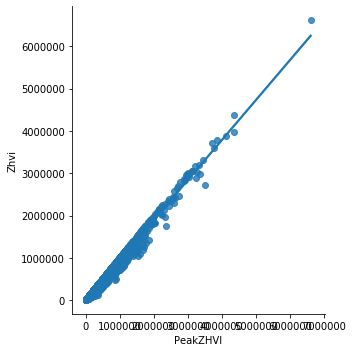

In [148]:
sns.lmplot(y = 'Zhvi', x = 'PeakZHVI', data=home_df_pandas)

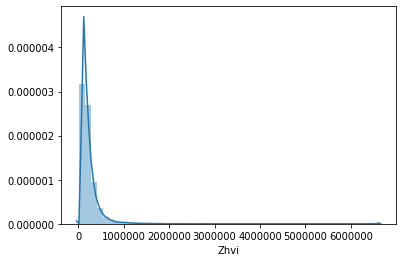

In [160]:
sns.distplot(home_df_pandas['Zhvi'])
plt.xlabel('Zhvi') 
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FAE9A527C8>]],
      dtype=object)

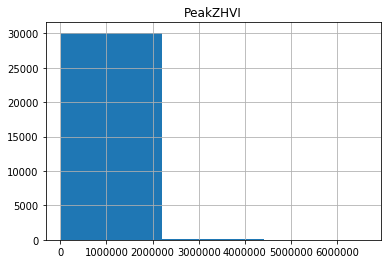

In [164]:
home_df_pandas.hist('PeakZHVI',bins=3)

### Analysis based on particular state
### Using sqlContext.sql to get Spark Dataframe

In [194]:
df3=sqlContext.sql(" select STATE,PeakZHVI from home_data_table GROUP BY STATE,PeakZHVI order by PeakZHVI desc ").show()


+-----+--------+
|STATE|PeakZHVI|
+-----+--------+
|   CA| 6612392|
|   NY| 4368033|
|   CA| 4348194|
|   CA| 4138998|
|   CA| 3858212|
|   CA| 3781768|
|   MA| 3726034|
|   NY| 3500608|
|   CA| 3448575|
|   FL| 3364591|
|   CA| 3343063|
|   NY| 3282902|
|   NY| 3243807|
|   NY| 3222553|
|   CO| 3143847|
|   CA| 3128878|
|   NY| 3120617|
|   CA| 3048343|
|   WA| 2997873|
|   CA| 2983776|
+-----+--------+
only showing top 20 rows



#### We got the CA state which has the highest PeakZHVI, now digging deeper to get highest PeakZHVI on CA county

In [195]:
df4 =  sqlContext.sql("select COUNTY,PeakZHVI from home_data_table WHERE STATE='CA' GROUP BY COUNTY,PeakZHVI order by PeakZHVI desc")

print (type(df4))
print (" ")
print (df4.show())

<class 'pyspark.sql.dataframe.DataFrame'>
 
+--------------------+--------+
|              COUNTY|PeakZHVI|
+--------------------+--------+
|    San Mateo County| 6612392|
|  Santa Clara County| 4348194|
|  Santa Clara County| 4138998|
|    San Mateo County| 3858212|
|  Santa Clara County| 3781768|
|  Santa Clara County| 3448575|
|  Santa Clara County| 3343063|
|        Marin County| 3128878|
|  Santa Clara County| 3048343|
|Santa Barbara County| 2983776|
|        Marin County| 2960718|
|  Santa Clara County| 2932032|
|  Santa Clara County| 2896844|
|    San Mateo County| 2885057|
|        Marin County| 2788653|
|    San Diego County| 2702423|
|  Santa Clara County| 2631821|
|San Francisco County| 2589464|
|    San Mateo County| 2567177|
| Contra Costa County| 2451215|
+--------------------+--------+
only showing top 20 rows

None


In [196]:
df4_pandas = df4.toPandas()
df4_pandas.head()

C:\Sparkjava\spark-2.4.5-bin-hadoop2.7\python\pyspark\sql\dataframe.py:2110: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 0.8.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.fallback.enabled' is set to true.
  warnings.warn(msg)


,COUNTY,PeakZHVI
0,San Mateo County,6612392
1,Santa Clara County,4348194
2,Santa Clara County,4138998
3,San Mateo County,3858212
4,Santa Clara County,3781768


#### Visualization based on CA state counties

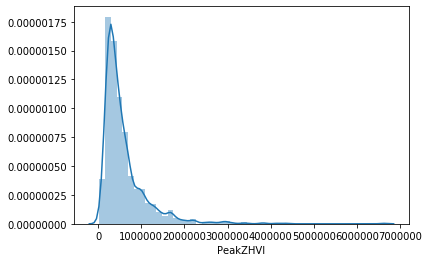

In [197]:
sns.distplot(df4_pandas['PeakZHVI'])
plt.xlabel('PeakZHVI') 
plt.show()

In [201]:
df5=sqlContext.sql("select CITY,PeakZHVI from home_data_table WHERE STATE='CA' AND COUNTY='San Mateo County' GROUP BY CITY,PeakZHVI order by PeakZHVI desc")
df5_pandas = df5.toPandas()
print(df5_pandas.count())
df5_pandas.head()

CITY        29
PeakZHVI    29
dtype: int64


,CITY,PeakZHVI
0,Atherton,6612392
1,Portola Valley,3858212
2,Burlingame,2885057
3,Menlo Park,2567177
4,Redwood City,2252749


In [203]:
df6 = sqlContext.sql("select CITY,PeakZHVI,ZHVI from home_data_table WHERE STATE='CA' AND COUNTY='San Mateo County' GROUP BY CITY,PeakZHVI,ZHVI order by PeakZHVI desc")
df6_pandas = df6.toPandas()
print(df6_pandas.count())
df6_pandas.head()


C:\Sparkjava\spark-2.4.5-bin-hadoop2.7\python\pyspark\sql\dataframe.py:2110: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 0.8.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.fallback.enabled' is set to true.
  warnings.warn(msg)


CITY        29
PeakZHVI    29
ZHVI        29
dtype: int64


,CITY,PeakZHVI,ZHVI
0,Atherton,6612392,6612392
1,Portola Valley,3858212,3776419
2,Burlingame,2885057,2858412
3,Menlo Park,2567177,2427708
4,Redwood City,2252749,2201865


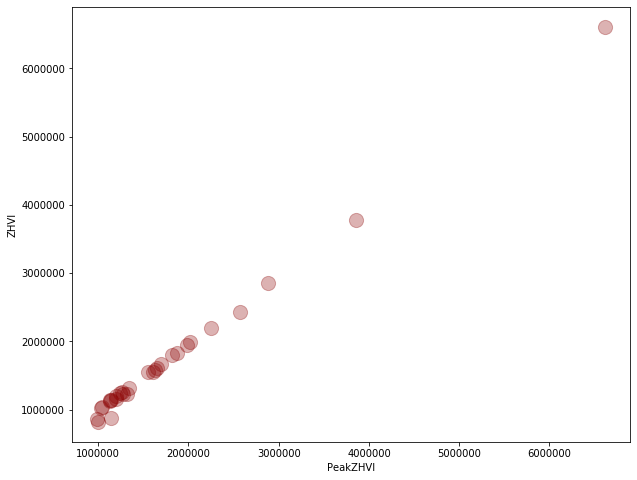

In [216]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8
sns.regplot(x=df6_pandas["PeakZHVI"], y=df6_pandas["ZHVI"], fit_reg=False, scatter_kws={"color":"darkred","alpha":0.3,"s":200} )



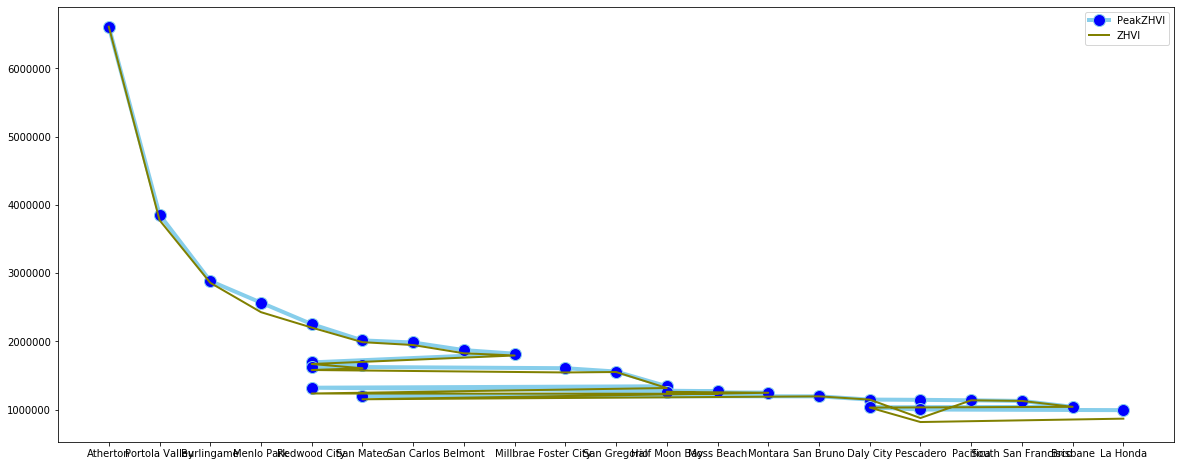

In [215]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 8
plt.plot( 'CITY', 'PeakZHVI', data=df6_pandas, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'CITY', 'ZHVI', data=df6_pandas, marker='', color='olive', linewidth=2)
plt.legend()


# HPI_AT_BDL_ZIP3 Dataset

In [427]:
df_hpi_pd = pd.read_excel('C:/DataMngtBigData/Week04/HPI_AT_BDL_ZIP3.xlsx')
df_hpi_pd.head()
df_hpi_pd['Annual Change (%)']=pd.to_numeric(df_hpi_pd['Annual Change (%)'],errors='coerce')
df_hpi_pd['HPI']=pd.to_numeric(df_hpi_pd['HPI'],errors='coerce')
df_hpi_pd['HPI with 1990 base']=pd.to_numeric(df_hpi_pd['HPI with 1990 base'],errors='coerce')
df_hpi_pd['HPI with 2000 base']=pd.to_numeric(df_hpi_pd['HPI with 2000 base'],errors='coerce')
df_hpi_pd.dropna()
df_hpi_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35829 entries, 0 to 35828
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Three-Digit ZIP Code  35829 non-null  int64  
 1   Year                  35829 non-null  int64  
 2   Annual Change (%)     34616 non-null  float64
 3   HPI                   35617 non-null  float64
 4   HPI with 1990 base    34480 non-null  float64
 5   HPI with 2000 base    35404 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 1.6 MB


In [428]:
hpi_df = spark.createDataFrame(df_hpi_pd)
display(hpi_df)

DataFrame[Three-Digit ZIP Code: bigint, Year: bigint, Annual Change (%): double, HPI: double, HPI with 1990 base: double, HPI with 2000 base: double]

In [248]:
type(hpi_df)

pyspark.sql.dataframe.DataFrame

In [249]:
hpi_df.count()

35829

In [154]:
hpi_df.show()

+--------------------+----+-----------------+------+------------------+------------------+
|Three-Digit ZIP Code|Year|Annual Change (%)|   HPI|HPI with 1990 base|HPI with 2000 base|
+--------------------+----+-----------------+------+------------------+------------------+
|                  10|1975|              NaN| 100.0|             23.29|              21.8|
|                  10|1976|             7.02|107.02|             24.92|             23.33|
|                  10|1977|             6.99| 114.5|             26.66|             24.96|
|                  10|1978|             7.19|122.73|             28.58|             26.76|
|                  10|1979|            16.49|142.97|             33.29|             31.17|
|                  10|1980|            12.18|160.39|             37.35|             34.97|
|                  10|1981|             7.87| 173.0|             40.29|             37.72|
|                  10|1982|            12.47|194.58|             45.31|             42.42|

In [198]:
hpi_df.printSchema()

root
 |-- Three-Digit ZIP Code: long (nullable = true)
 |-- Year: long (nullable = true)
 |-- Annual Change (%): double (nullable = true)
 |-- HPI: double (nullable = true)
 |-- HPI with 1990 base: double (nullable = true)
 |-- HPI with 2000 base: double (nullable = true)



### Renaming the columns

In [429]:
#hpi_df=hpi_df.withColumnRenamed("Three-Digit ZIP Code","Zip_Code").printSchema()
#hpi_df=hpi_df.withColumnRenamed("Annual Change (%)","Annual_Change").printSchema()
#hpi_df=hpi_df.withColumnRenamed("HPI with 1990 base","HPI_1990").printSchema()
#hpi_df=hpi_df.withColumnRenamed("HPI with 2000 base","HPI_2000").printSchema()

df_dataset= hpi_df.withColumnRenamed("Three-Digit ZIP Code","Zip_Code") \
    .withColumnRenamed("Annual Change (%)","Annual_Change")\
    .withColumnRenamed("HPI with 1990 base","HPI_1990")\
    .withColumnRenamed("HPI with 2000 base","HPI_2000")
df_dataset.show()

+--------+----+-------------+------+--------+--------+
|Zip_Code|Year|Annual_Change|   HPI|HPI_1990|HPI_2000|
+--------+----+-------------+------+--------+--------+
|      10|1975|          NaN| 100.0|   23.29|    21.8|
|      10|1976|         7.02|107.02|   24.92|   23.33|
|      10|1977|         6.99| 114.5|   26.66|   24.96|
|      10|1978|         7.19|122.73|   28.58|   26.76|
|      10|1979|        16.49|142.97|   33.29|   31.17|
|      10|1980|        12.18|160.39|   37.35|   34.97|
|      10|1981|         7.87| 173.0|   40.29|   37.72|
|      10|1982|        12.47|194.58|   45.31|   42.42|
|      10|1983|         5.58|205.43|   47.84|   44.79|
|      10|1984|        15.36|236.98|   55.18|   51.66|
|      10|1985|         12.1|265.64|   61.86|   57.91|
|      10|1986|        14.62|304.47|    70.9|   66.38|
|      10|1987|        21.42|369.68|   86.08|    80.6|
|      10|1988|        15.62|427.42|   99.53|   93.18|
|      10|1989|         2.56|438.36|  102.08|   95.57|
|      10|

In [430]:
df_dataset.na.drop(how='any')
df_dataset.show()

+--------+----+-------------+------+--------+--------+
|Zip_Code|Year|Annual_Change|   HPI|HPI_1990|HPI_2000|
+--------+----+-------------+------+--------+--------+
|      10|1975|          NaN| 100.0|   23.29|    21.8|
|      10|1976|         7.02|107.02|   24.92|   23.33|
|      10|1977|         6.99| 114.5|   26.66|   24.96|
|      10|1978|         7.19|122.73|   28.58|   26.76|
|      10|1979|        16.49|142.97|   33.29|   31.17|
|      10|1980|        12.18|160.39|   37.35|   34.97|
|      10|1981|         7.87| 173.0|   40.29|   37.72|
|      10|1982|        12.47|194.58|   45.31|   42.42|
|      10|1983|         5.58|205.43|   47.84|   44.79|
|      10|1984|        15.36|236.98|   55.18|   51.66|
|      10|1985|         12.1|265.64|   61.86|   57.91|
|      10|1986|        14.62|304.47|    70.9|   66.38|
|      10|1987|        21.42|369.68|   86.08|    80.6|
|      10|1988|        15.62|427.42|   99.53|   93.18|
|      10|1989|         2.56|438.36|  102.08|   95.57|
|      10|

In [431]:
type(df_dataset)

pyspark.sql.dataframe.DataFrame

### Creating the temporary sql table from dataframe

In [432]:
df_dataset.createOrReplaceTempView("hpi_data_table") # create temporary table

In [315]:
df_dataset.printSchema()

root
 |-- Zip_Code: long (nullable = true)
 |-- Year: long (nullable = true)
 |-- Annual_Change: double (nullable = true)
 |-- HPI: double (nullable = true)
 |-- HPI_1990: double (nullable = true)
 |-- HPI_2000: double (nullable = true)



In [433]:
#drop nan values
df_dataset=df_dataset.dropna(subset=['Annual_Change'])
df_dataset.show()



+--------+----+-------------+------+--------+--------+
|Zip_Code|Year|Annual_Change|   HPI|HPI_1990|HPI_2000|
+--------+----+-------------+------+--------+--------+
|      10|1976|         7.02|107.02|   24.92|   23.33|
|      10|1977|         6.99| 114.5|   26.66|   24.96|
|      10|1978|         7.19|122.73|   28.58|   26.76|
|      10|1979|        16.49|142.97|   33.29|   31.17|
|      10|1980|        12.18|160.39|   37.35|   34.97|
|      10|1981|         7.87| 173.0|   40.29|   37.72|
|      10|1982|        12.47|194.58|   45.31|   42.42|
|      10|1983|         5.58|205.43|   47.84|   44.79|
|      10|1984|        15.36|236.98|   55.18|   51.66|
|      10|1985|         12.1|265.64|   61.86|   57.91|
|      10|1986|        14.62|304.47|    70.9|   66.38|
|      10|1987|        21.42|369.68|   86.08|    80.6|
|      10|1988|        15.62|427.42|   99.53|   93.18|
|      10|1989|         2.56|438.36|  102.08|   95.57|
|      10|1990|        -2.03|429.44|   100.0|   93.62|
|      10|

In [453]:
df_dataset_pandas=df_dataset.toPandas()

In [434]:
df_dataset.select(['Year', 'HPI','Annual_Change']).describe().show()

+-------+------------------+------------------+-----------------+
|summary|              Year|               HPI|    Annual_Change|
+-------+------------------+------------------+-----------------+
|  count|             34616|             34616|            34616|
|   mean|1998.3746822278715| 299.3734697827594|3.913496648948464|
| stddev|11.942778941398744|205.86037433839192|6.372764628217662|
|    min|              1976|             53.28|           -44.16|
|    max|              2018|           2857.74|            84.97|
+-------+------------------+------------------+-----------------+



In [435]:
dh= sqlContext.sql("select * from hpi_data_table")
dh_pandas = dh.toPandas()

dh_pandas.head()

,Zip_Code,Year,Annual_Change,HPI,HPI_1990,HPI_2000
0,10,1975,NaN,100.00,23.29,21.80
1,10,1976,7.02,107.02,24.92,23.33
2,10,1977,6.99,114.50,26.66,24.96
3,10,1978,7.19,122.73,28.58,26.76
4,10,1979,16.49,142.97,33.29,31.17


#### From the below query result we can say that year=2018 with zip_code=830 had the highest HPI_1990

In [436]:
dh1=sqlContext.sql("select * from hpi_data_table ORDER BY HPI_1990 desc")
dh1_pandas = dh1.toPandas()
dh1_pandas.sort_values('HPI_1990',ascending=False)

,Zip_Code,Year,Annual_Change,HPI,HPI_1990,HPI_2000
1349,830,2018,14.54,926.26,669.89,269.67
1350,588,2015,5.21,431.06,617.08,397.17
1351,588,2014,6.15,409.74,586.55,377.52
1352,830,2017,6.35,808.69,584.86,235.44
1353,588,2018,3.66,408.20,584.36,376.11
...,...,...,...,...,...,...
1344,997,1981,NaN,NaN,NaN,NaN
1345,997,1982,NaN,NaN,NaN,NaN
1346,997,1983,NaN,NaN,NaN,NaN
1347,998,1982,NaN,NaN,NaN,NaN


#### From the below query result we can say that year=2018 with zip_code=943 had the highest HPI

In [450]:
dh12=sqlContext.sql("select * from hpi_data_table ORDER BY HPI desc")
dh12.na.drop(how='any')
dh12_pandas = dh12.toPandas()
dh12_pandas.sort_values('HPI',ascending=False)


,Zip_Code,Year,Annual_Change,HPI,HPI_1990,HPI_2000
212,943,2018,13.41,2857.74,495.51,261.39
213,943,2017,10.27,2519.74,436.90,230.48
214,941,2018,8.38,2299.90,415.13,279.70
215,943,2016,15.82,2284.98,396.20,209.00
216,944,2018,14.77,2256.27,421.51,267.00
...,...,...,...,...,...,...
207,997,1981,NaN,NaN,NaN,NaN
208,997,1982,NaN,NaN,NaN,NaN
209,997,1983,NaN,NaN,NaN,NaN
210,998,1982,NaN,NaN,NaN,NaN


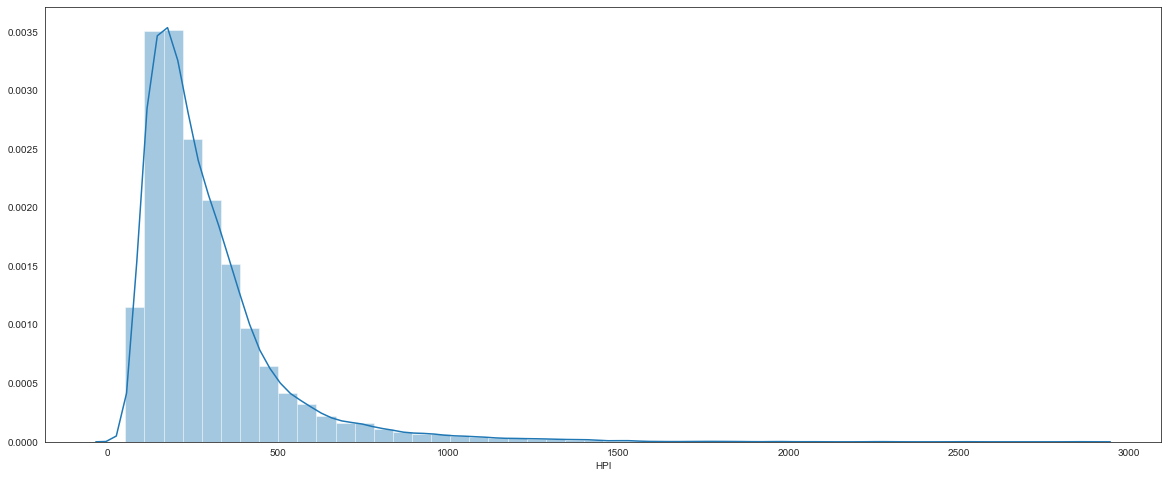

In [439]:
sample_df = dh12.select(['HPI']).sample(False, 0.5, 42)
sample_df.na.drop(how='any')
pandas_df = sample_df.toPandas()
pandas_df.dropna(axis=1,how='any')
# Plot distribution of pandas_df and display plot
sns.distplot(pandas_df)
plt.xlabel('HPI') 
plt.show()

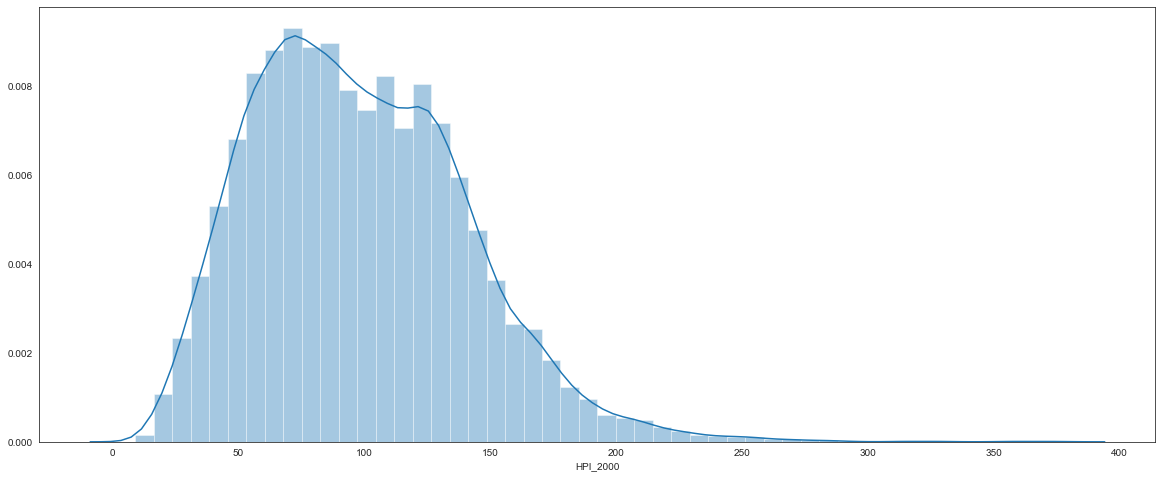

In [441]:
sample_df1 = dh12.select(['HPI_2000']).sample(False, 0.5, 42)
pandas_df1 = sample_df1.toPandas()

# Plot distribution of pandas_df and display plot
sns.distplot(pandas_df1)
plt.xlabel('HPI_2000') 
plt.show()

In [442]:
dh12.printSchema()

root
 |-- Zip_Code: long (nullable = true)
 |-- Year: long (nullable = true)
 |-- Annual_Change: double (nullable = true)
 |-- HPI: double (nullable = true)
 |-- HPI_1990: double (nullable = true)
 |-- HPI_2000: double (nullable = true)



### Converting the datatype for the columns for visualzation

In [454]:
df_data = df_dataset.select(df_dataset.HPI_1990.cast("int"))
df_data1 = df_dataset.select(df_dataset.HPI_2000.cast("int"))
pandas_df_data = df_data.toPandas()
pandas_df_data1 = df_data1.toPandas()
df_concat = pd.concat([pandas_df_data,pandas_df_data1,df_dataset_pandas['HPI']], axis=1)
df_concat.head()

,HPI_1990,HPI_2000,HPI
0,24,23,107.02
1,26,24,114.50
2,28,26,122.73
3,33,31,142.97
4,37,34,160.39


### Fetching the values for highest HPI and HPI_1990 value from dataframe

In [457]:
dh5= sqlContext.sql("select * from hpi_data_table WHERE YEAR=2018 AND Zip_Code IN (943,830) ")
dh5.na.drop(how='any')
dh5_pandas = dh5.toPandas()
dh5_pandas.head()

,Zip_Code,Year,Annual_Change,HPI,HPI_1990,HPI_2000
0,830,2018,14.54,926.26,669.89,269.67
1,943,2018,13.41,2857.74,495.51,261.39


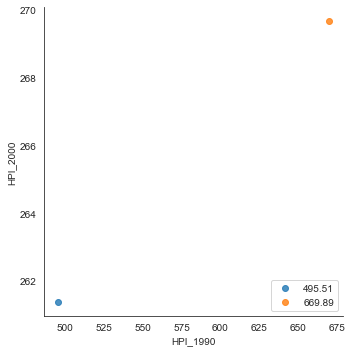

In [466]:
sns.lmplot( x="HPI_1990", y="HPI_2000", data=dh5_pandas, fit_reg=False, hue='HPI_1990', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
plt.show()


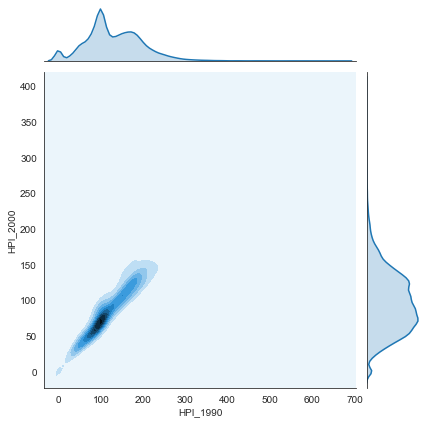

In [349]:
sns.jointplot(x=df_concat["HPI_1990"], y=df_concat["HPI_2000"], kind='kde')

In [368]:
dh2=sqlContext.sql("select * from hpi_data_table WHERE Year='2018'")
dh2_pandas = dh2.toPandas()
dh2_pandas.head()

,Zip_Code,Year,Annual_Change,HPI,HPI_1990,HPI_2000
0,10,2018,4.25,742.74,172.96,161.93
1,11,2018,7.16,764.42,149.87,160.31
2,12,2018,5.41,414.19,163.31,158.15
3,13,2018,7.91,285.71,172.45,157.56
4,14,2018,6.68,739.20,191.41,149.97


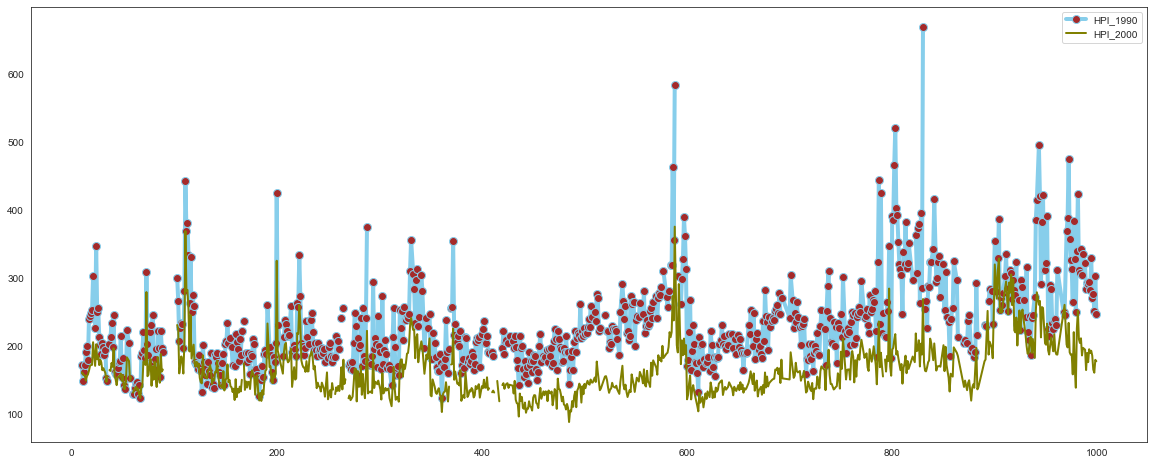

In [371]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 8
plt.plot( 'Zip_Code', 'HPI_1990', data=dh2_pandas, marker='o', markerfacecolor='brown', markersize=8, color='skyblue', linewidth=4)
plt.plot( 'Zip_Code', 'HPI_2000', data=dh2_pandas, marker='', color='olive', linewidth=2)
plt.legend()

In [386]:
dh3=sqlContext.sql("select Zip_Code,HPI from hpi_data_table WHERE Year='2018' GROUP BY Zip_Code,HPI ")
dh3_pandas = dh3.toPandas()
dh3_pandas.sort_values('HPI',ascending=False)
dh3_pandas.head()

,Zip_Code,HPI
0,227,278.93
1,804,898.57
2,903,1270.41
3,937,703.06
4,172,294.69


In [414]:
dh4=sqlContext.sql("select Annual_Change from hpi_data_table WHERE Year=2018 order by Annual_Change  ")
dh4.na.drop(how='any')
dh4_pandas = dh4.toPandas()
dh4_pandas.head()

,Annual_Change
0,-12.26
1,-8.68
2,-7.55
3,-7.38
4,-6.86


In [415]:
dh4_pandas.isna().sum()

Annual_Change    2
dtype: int64

[Text(0.5, 0, '')]

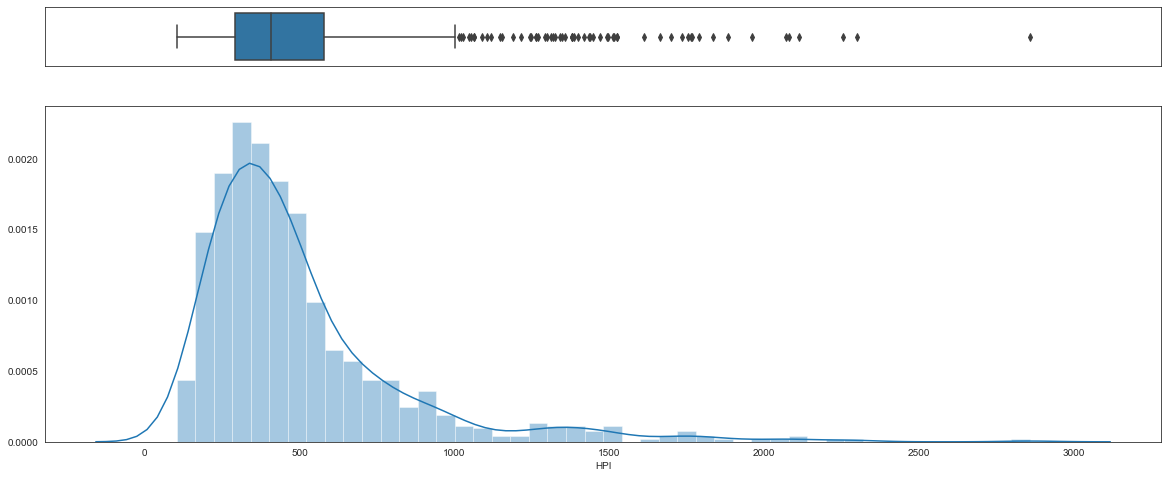

In [417]:

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(dh3_pandas["HPI"], ax=ax_box)
sns.distplot(dh3_pandas["HPI"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

